<a href="https://colab.research.google.com/github/skmerick/ifood/blob/main/Notebook/Aprendizagem_Supervisionada_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto - Parte 3 - Aprendizagem Supervisionada - Regressão - Exercícios


--- 
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">

# Carregando a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pasta_raiz = '/content/drive/MyDrive/datasets/ifood'

In [ ]:
df_orders = pd.read_csv(f'{pasta_raiz}/df_orders.csv', parse_dates=['order_timestamp_local'])
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11 13:22:06.497000+00:00,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,1.0,5.0,5.0,Alta,NaN,6.0,NaN,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06 17:57:17.967000+00:00,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,NaN,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11 20:42:32.058000+00:00,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,NaN,Active,1.0,5.0,5.0,Media,1. Marlin,6.0,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


# Criação da ABT (10 pontos)


### Agregando receita por dia

**(1.5 ponto) `Q1`** Crie um DataFrame chamado `df` que deverá somar o valor total dos pedidos. Utilize a variável `order_timestamp_local` para recuperar a data. Faça o agrupamento por dia e por fim faça a ordenação do menor para o maior.

O resultado esperado é um DataFrame com duas colunas (`order_date` e `receita`). 

| order_date 	| receita   	|
|-----------:	|-----------	|
| 2019-06-01 	| 209061.01 	|
| 2019-06-02 	| 213995.65 	|
| 2019-06-03 	| 108973.96 	|


In [ ]:
df = (
    df_orders
    .assign(order_date = df_orders['order_timestamp_local'].dt.date)
    .groupby('order_date')
    .agg(receita = ('order_total', 'sum'))
    .reset_index()
    .sort_values('order_date')
    .filter(['order_date', 'receita'])
)
df.head()

,order_date,receita
0,2019-06-01,209061.01
1,2019-06-02,213995.65
2,2019-06-03,108973.96
3,2019-06-04,106973.23
4,2019-06-05,122957.05


**(0.5 ponto) `Q1.1`** Faça um plot da série temporal. Utilize o método `.plot()`. 

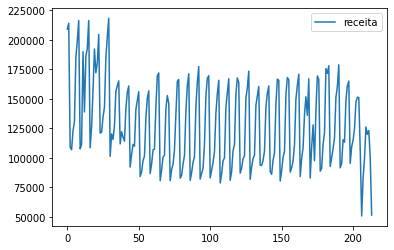

In [ ]:
df.plot()

### Train-Test Split

**(2.0 ponto) `Q2`** Crie dois dataframes: `df_train` com dados de junho até novembro e `df_test` com dados de dezembro.

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

df_train = df.query('order_date < "2019-12-01"')
df_test = df.query('order_date >= "2019-12-01"')

print(df_train.shape)
print(df_test.shape)

(183, 2)
(31, 2)


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - A resposta do exercício deverá ser:

`df_train` deverá ter 183 linhas e `df_test` deverá ter 31 linhas.

### Feature Engineering

#### Variáveis Sazonais

**(2.0 ponto) `Q3`** Crie as seguintes variáveis sazonais para ambos os DataFrames `df_train` e `df_test`:
- `mes`: mês
- `dia`: dia do mês
- `weekday`: dia da semana
- `dayofyear`: dia do ano

In [ ]:
df_train =(df_train
    .assign(mes = df_train['order_date'].dt.month)
    .assign(dia = df_train['order_date'].dt.day)
    .assign(weekday = df_train['order_date'].dt.dayofweek)
    .assign(dayofyear = df_train['order_date'].dt.dayofyear)
)
df_train

,order_date,receita,mes,dia,weekday,dayofyear
0,2019-06-01,209061.01,6,1,5,152
1,2019-06-02,213995.65,6,2,6,153
2,2019-06-03,108973.96,6,3,0,154
3,2019-06-04,106973.23,6,4,1,155
4,2019-06-05,122957.05,6,5,2,156
...,...,...,...,...,...,...
178,2019-11-26,91214.85,11,26,1,330
179,2019-11-27,111371.52,11,27,2,331
180,2019-11-28,121050.43,11,28,3,332
181,2019-11-29,175600.49,11,29,4,333


In [ ]:
df_test =(df_test
    .assign(mes = df_test['order_date'].dt.month)
    .assign(dia = df_test['order_date'].dt.day)
    .assign(weekday = df_test['order_date'].dt.dayofweek)
    .assign(dayofyear = df_test['order_date'].dt.dayofyear)
)
df_test

,order_date,receita,mes,dia,weekday,dayofyear
183,2019-12-01,178085.12,12,1,6,335
184,2019-12-02,92833.10,12,2,0,336
185,2019-12-03,99995.42,12,3,1,337
186,2019-12-04,107698.24,12,4,2,338
187,2019-12-05,117057.18,12,5,3,339
188,2019-12-06,151199.32,12,6,4,340
189,2019-12-07,160587.43,12,7,5,341
190,2019-12-08,178849.33,12,8,6,342
191,2019-12-09,91649.80,12,9,0,343
192,2019-12-10,95249.16,12,10,1,344


#### Variáveis Lag

**(2.0 ponto) `Q4`** Crie as seguintes variáveis de lag para ambos os DataFrames `df_train` e `df_test`:

- `receita_atual`: receita do dia em que a previsão é feita
- `receita_anterior`: receita do dia anterior ao dia em que a previsão é feita
- `diff_receitas`: diferença de receita do dia atual para o dia anterios

Utilize o método `.shift()` da coluna `df['receita']`.  O método `shift()` é utilizada para deslocar o índice pelo número desejado de períodos com uma frequencia de tempo opcional.




In [ ]:
# Antes de testar o comando .shift(n)
df['receita'][:4]

0    209061.01
1    213995.65
2    108973.96
3    106973.23
Name: receita, dtype: float64

In [ ]:
# Depois de testar o comando .shift(1)
df['receita'][:4].shift(1)

0          NaN
1    209061.01
2    213995.65
3    108973.96
Name: receita, dtype: float64

In [ ]:
# Depois de testar o comando .shift(2)
df['receita'][:4].shift(2)

0          NaN
1          NaN
2    209061.01
3    213995.65
Name: receita, dtype: float64

In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train =(df_train
        .assign(receita_atual = df_train['receita'].shift(1))
        .assign(receita_anterior = df_train['receita'].shift(2))
        .assign(diff_receitas = lambda df: (df['receita_atual'] - df['receita_anterior']))
)
df_train

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73
...,...,...,...,...,...,...,...,...,...
178,2019-11-26,91214.85,11,26,1,330,88803.48,166519.97,-77716.49
179,2019-11-27,111371.52,11,27,2,331,91214.85,88803.48,2411.37
180,2019-11-28,121050.43,11,28,3,332,111371.52,91214.85,20156.67
181,2019-11-29,175600.49,11,29,4,333,121050.43,111371.52,9678.91


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test =(df_test
        .assign(receita_atual = df_test['receita'].shift(1))
        .assign(receita_anterior = df_test['receita'].shift(2))
        .assign(diff_receitas = lambda df : (df['receita_atual'] - df['receita_anterior']))
)
df_test

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82
188,2019-12-06,151199.32,12,6,4,340,117057.18,107698.24,9358.94
189,2019-12-07,160587.43,12,7,5,341,151199.32,117057.18,34142.14
190,2019-12-08,178849.33,12,8,6,342,160587.43,151199.32,9388.11
191,2019-12-09,91649.80,12,9,0,343,178849.33,160587.43,18261.90
192,2019-12-10,95249.16,12,10,1,344,91649.80,178849.33,-87199.53


#### Média Móvel dos últimos 3 dias

**(2.0 ponto) `Q5`** Cria uma variável que representa a média móvel dos últimos 3 dias anteriores ao dia de previsão para ambos os DataFrames `df_train` e `df_test`.

- `media_movel`: média móvel dos últimos 3 dias.

Utilize o método `.rolling(3)` que possibilita realizar cálculos para uma determinada janela deslizante. O valor 3, significa o tamanho da janela que será utilizada para deslizar.


In [ ]:
df_train['receita_atual'][:9]

0          NaN
1    209061.01
2    213995.65
3    108973.96
4    106973.23
5    122957.05
6    130615.30
7    185314.25
8    199144.33
Name: receita_atual, dtype: float64

In [ ]:
df_train['receita_atual'][:9].rolling(3).mean()

0              NaN
1              NaN
2              NaN
3    177343.540000
4    143314.280000
5    112968.080000
6    120181.860000
7    146295.533333
8    171691.293333
Name: receita_atual, dtype: float64

In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train = (df_train
    .assign(media_movel = df_train['receita_atual'].rolling(3).mean())
)
df_train

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64,NaN
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69,177343.540000
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73,143314.280000
...,...,...,...,...,...,...,...,...,...,...
178,2019-11-26,91214.85,11,26,1,330,88803.48,166519.97,-77716.49,141583.280000
179,2019-11-27,111371.52,11,27,2,331,91214.85,88803.48,2411.37,115512.766667
180,2019-11-28,121050.43,11,28,3,332,111371.52,91214.85,20156.67,97129.950000
181,2019-11-29,175600.49,11,29,4,333,121050.43,111371.52,9678.91,107878.933333


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test = (df_test
    .assign(media_movel = df_test['receita_atual'].rolling(3).mean())
)
df_test.head()

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02,NaN
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32,123637.880000
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82,100175.586667


# Modelagem (10 pontos)

Iremos testar diferentes algoritmos de regressão para o problema em questão.

## Criando os conjuntos de treino e teste

**(1.0 ponto) `Q6`** Crie os seguintes dataframes selecionando apenas as colunas `['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']` como **features** e a coluna `receita` como **target**. Remova todas as linhas com valores faltantes.

- `X_train`
- `X_test`
- `y_train`
- `y_test`

In [ ]:
features = ['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']
target   = 'receita'

df_train = df_train.dropna()
df_test = df_test.dropna()



Remova os valores faltantes `.dropna()` existentes que foram criados na parte de Feature Engineering e faça a filtragem correspondente utilizando as variáveis `features` e `target`.

In [ ]:
X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(180, 8)
(180,)
(28, 8)
(28,)


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - Verifique a quantidade de linhas e colunas para as variáveis `X_train`, `X_test`, `y_train` e `y_test`:

    X_train - (180, 8) 
    y_train - (180,)

    X_test - (28, 8)
    y_test - (28,)


## Regressão Linear

**(0.5 ponto) `Q7`** Treine uma regressão linear para o conjunto de treino e salve na variável `lr_model`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

Utilize o `StandardScaler` para normalizar as variáveis. Utilize a classe `SklearnTransformerWrapper` da biblioteca `feature_engine`.

In [ ]:
!pip install feature_engine

     |████████████████████████████████| 180 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline

lr_model = Pipeline(steps=[
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
    ('linear_regression', LinearRegression())
])

lr_model.fit(X_train, y_train)


Pipeline(steps=[('standard_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler())),
                ('linear_regression', LinearRegression())])

## Criando Função que retorna todas as Métricas

**(1.0 ponto) `Q8`** Crie uma função chamada `log_results` que deverá retornar um DataFrame com todas as métricas de regressão. A função deverá conter os seguintes parâmetros:

- `modelo_objeto` esse parâmetro é obrigatório e tem que ser a variável que representa o objeto do modelo já "fitado".
- `nome_modelo` deverá ser o nome do modelo
- `X_train, X_test, y_train, y_test` são os parâmetros referentes aos conjuntos de treino e teste que serão avaliados.

Lembre-se de criar funções auxiliares para facilitar a criação das métricas.

Exemplo de chamada da função:

    lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)


A saída da função para a regressão linear deverá ser a seguinte:

|   	|      modelo      	|  modo  	|    r2    	| r2_ajustado 	|      mse     	|     rmse     	|   rmsle  	|      mae     	|     medae    	|   mape   	|
|--:	|:----------------:	|:------:	|:--------:	|:-----------:	|:------------:	|:------------:	|:--------:	|:------------:	|:------------:	|:--------:	|
| 0 	| Regressão Linear 	| treino 	| 0.851830 	|   0.844898  	| 1.846833e+08 	| 13589.823475 	| 0.102354 	| 10438.198114 	|  8183.734656 	| 0.081407 	|
| 1 	| Regressão Linear 	|  teste 	| 0.545792 	|   0.354547  	| 4.476170e+08 	| 21156.961622 	| 0.221724 	| 18787.508466 	| 16495.304482 	| 0.176210 	|


In [ ]:
# importando as métricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# definindo métricas auxiliares
def adjusted_r2(y_esperado, y_previsto, X_treino):
  r2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - r2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))

def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    y_previsto = modelo_objeto.predict(X_train)
    y_esperado = y_train.copy()
    r2_train = r2_score(y_esperado, y_previsto)
    adjustedr2_train = adjusted_r2(y_esperado, y_previsto, X_train)
    mse_train = mean_squared_error(y_esperado, y_previsto)
    rmse_train = np.sqrt(mse_train)
    rmsle_train = np.sqrt(mean_squared_log_error(y_esperado, y_previsto))
    mae_train = mean_absolute_error(y_esperado, y_previsto)
    medae_train = median_absolute_error(y_esperado, y_previsto)
    mape_train = mape(y_esperado, y_previsto)
    treino = 'treino'
    teste = 'teste'

    y_previsto = modelo_objeto.predict(X_test)
    y_esperado = y_test.copy()
    r2_test = r2_score(y_esperado, y_previsto)
    adjustedr2_test = adjusted_r2(y_esperado, y_previsto, X_test)
    mse_test = mean_squared_error(y_esperado, y_previsto)
    rmse_test = np.sqrt(mse_test)
    rmsle_test = np.sqrt(mean_squared_log_error(y_esperado, y_previsto))
    mae_test = mean_absolute_error(y_esperado, y_previsto)
    medae_test = median_absolute_error(y_esperado, y_previsto)
    mape_test = mape(y_esperado, y_previsto)

    return pd.DataFrame(data={
    'modelo' : [nome_modelo, nome_modelo], 
    'modo': ['treino', 'teste'],
    'R2' : [r2_train, r2_test],
    'R2 ajustado' : [adjustedr2_train, adjustedr2_test],
    'MSE' : [mse_train, mse_test],
    'RMSE' : [rmse_train, rmse_test],
    'RMSLE' : [rmsle_train, rmsle_test],
    'MAE' : [mae_train, mae_test],
    'MEDAE' : [medae_train, medae_test],
    'MAPE' : [mape_train, mape_test]
  })

**(0.5 ponto) `Q8.1`** Aplique a função desenvolvida anteriormente para o modelo `lr_model` criado no exercício `Q7`. Salve o retorno da função na variável `lr_results`.

In [ ]:
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)

## Ridge Regression

**(1.0 ponto) `Q9`** Treine uma [Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer) (Regressão Linear menos susceptível ao overfitting) para o conjunto de treino e salve na variável `ridge_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `ridge_results`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[('scaling', SklearnTransformerWrapper(transformer=StandardScaler(), variables=features)),
                              ('model', Ridge())])

ridge_model.fit(X_train, y_train)

ridge_results = log_results(ridge_model, 'Ridge', X_train, X_test, y_train, y_test)
ridge_results


,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,Ridge,treino,0.841957,0.834563,1.969900e+08,14035.311375,0.102559,10672.764852,8595.277860,0.081940
1,Ridge,teste,0.655312,0.510180,3.396867e+08,18430.592704,0.195752,15391.855336,12434.615462,0.154088


## Decision Tree

**(1.0 ponto) `Q10`**  Treine uma Decision Tree para o conjunto de treino e salve na variável `tree_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `tree_results`. 

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=30, max_depth=3)

# continue o código abaixo
tree_model.fit(X_train, y_train)

tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)
tree_results

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,Decision Tree,treino,0.923725,0.920157,9.507078e+07,9750.424492,0.073733,6746.007212,4908.518958,0.053235
1,Decision Tree,teste,0.602498,0.435129,3.917338e+08,19792.265011,0.210369,14953.630908,11020.422754,0.161242


## Random Forest

**(1.0 ponto) `Q11`** Treine uma Random Forest para o conjunto de treino e salve na variável `rf_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `rf_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=30, max_depth=3)

# continue o código abaixo
rf_model.fit(X_train, y_train)

rf_results = log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)
rf_results

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,Random Forest,treino,0.937366,0.934436,7.806827e+07,8835.625036,0.067588,6253.690627,5172.735925,0.049819
1,Random Forest,teste,0.650897,0.503906,3.440376e+08,18548.251670,0.202082,13704.852482,10384.784394,0.150676


## LGBM

**(1.0 ponto) `Q12`** Treine um LighGBM para o conjunto de treino e salve na variável `lgbm_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `lgbm_results`.

Utilize os parâmetros `random_state=30`

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(random_state=30)


# continue o código abaixo
lgbm_model.fit(X_train, y_train)

lgbm_results = log_results(lgbm_model, 'LGBM', X_train, X_test, y_train, y_test)
lgbm_results

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,LGBM,treino,0.972437,0.971148,3.435530e+07,5861.339264,0.041866,3840.388186,2335.820206,0.029630
1,LGBM,teste,0.675813,0.539313,3.194828e+08,17874.082353,0.201195,12159.993930,6421.430539,0.140102


## XGBoost

**(1.0 ponto) `Q13`** Treine um XGBoost para o conjunto de treino e salve na variável `xgb_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `xgb_results`.

Utilize os parâmetros `random_state=30`



In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=30)

# continue o código abaixo
xgb_model.fit(X_train, y_train)

xgb_results = log_results(xgb_model, 'XGB', X_train, X_test, y_train, y_test)
xgb_results

[01:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,XGB,treino,0.988030,0.987470,1.492003e+07,3862.645202,0.029643,2791.044634,2037.927344,0.021965
1,XGB,teste,0.517286,0.314038,4.757097e+08,21810.770186,0.231611,15371.529408,9879.521719,0.174200


## CatBoost

**(1.0 ponto) `Q14`** Treine um CatBoost para o conjunto de treino e salve na variável `cat_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `cat_results`.

Utilize os parâmetros `random_state=30`

PS: não esqueça de executar a linha para instalar a biblioteca `catboost`.

In [ ]:
!pip install catboost==0.25.1

     |████████████████████████████████| 67.3 MB 11 kB/s 


In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(random_state=30)

# continue o código abaixo
cat_model.fit(X_train, y_train)

cat_results = log_results(cat_model, 'cat', X_train, X_test, y_train, y_test)
cat_results

Learning rate set to 0.028763
0:	learn: 34562.4926932	total: 47.7ms	remaining: 47.7s
1:	learn: 34037.0082301	total: 49.6ms	remaining: 24.7s
2:	learn: 33377.3096763	total: 51.2ms	remaining: 17s
3:	learn: 32787.4715584	total: 52.5ms	remaining: 13.1s
4:	learn: 32148.8641297	total: 53.9ms	remaining: 10.7s
5:	learn: 31591.4462022	total: 55.2ms	remaining: 9.14s
6:	learn: 31130.6405119	total: 56.6ms	remaining: 8.03s
7:	learn: 30534.1115904	total: 57.9ms	remaining: 7.18s
8:	learn: 29976.7288115	total: 59.2ms	remaining: 6.52s
9:	learn: 29398.5790885	total: 60.6ms	remaining: 6s
10:	learn: 28862.3723273	total: 61.9ms	remaining: 5.56s
11:	learn: 28355.1041543	total: 63.2ms	remaining: 5.2s
12:	learn: 27828.2913495	total: 64.4ms	remaining: 4.89s
13:	learn: 27315.5620659	total: 65.8ms	remaining: 4.63s
14:	learn: 26824.7410509	total: 66.9ms	remaining: 4.39s
15:	learn: 26368.7271883	total: 68.2ms	remaining: 4.19s
16:	learn: 25911.4417675	total: 69.5ms	remaining: 4.02s
17:	learn: 25492.3172232	total: 70

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,cat,treino,0.999161,0.999122,1.045180e+06,1022.340307,0.008317,813.358367,672.576628,0.006579
1,cat,teste,0.427845,0.186938,5.638524e+08,23745.576676,0.247428,17455.239741,13120.248447,0.195485


## Juntando todos os resultados

**(0.5 ponto) `Q15`** Consolide todos os resultados acima em uma única tabela. Dica: use a função `pd.concat()`.

In [ ]:
model_results = pd.concat([lr_results, ridge_results, tree_results, rf_results, lgbm_results, xgb_results, cat_results ])
model_results

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,Regressão Linear,treino,0.851830,0.844898,1.846833e+08,13589.823475,0.102354,10438.198114,8183.734656,0.081407
1,Regressão Linear,teste,0.545792,0.354547,4.476170e+08,21156.961622,0.221724,18787.508466,16495.304482,0.176210
0,Ridge,treino,0.841957,0.834563,1.969900e+08,14035.311375,0.102559,10672.764852,8595.277860,0.081940
1,Ridge,teste,0.655312,0.510180,3.396867e+08,18430.592704,0.195752,15391.855336,12434.615462,0.154088
0,Decision Tree,treino,0.923725,0.920157,9.507078e+07,9750.424492,0.073733,6746.007212,4908.518958,0.053235
1,Decision Tree,teste,0.602498,0.435129,3.917338e+08,19792.265011,0.210369,14953.630908,11020.422754,0.161242
0,Random Forest,treino,0.937366,0.934436,7.806827e+07,8835.625036,0.067588,6253.690627,5172.735925,0.049819
1,Random Forest,teste,0.650897,0.503906,3.440376e+08,18548.251670,0.202082,13704.852482,10384.784394,0.150676
0,LGBM,treino,0.972437,0.971148,3.435530e+07,5861.339264,0.041866,3840.388186,2335.820206,0.029630
1,LGBM,teste,0.675813,0.539313,3.194828e+08,17874.082353,0.201195,12159.993930,6421.430539,0.140102


**(0.5 ponto) `Q16`** Qual o modelo que apresentou o melhor R2 ajustado na base de treino?

In [ ]:
model_results.sort_values(by='R2', ascending=False)

# CATBOOST

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,cat,treino,0.999161,0.999122,1.045180e+06,1022.340307,0.008317,813.358367,672.576628,0.006579
0,XGB,treino,0.988030,0.987470,1.492003e+07,3862.645202,0.029643,2791.044634,2037.927344,0.021965
0,LGBM,treino,0.972437,0.971148,3.435530e+07,5861.339264,0.041866,3840.388186,2335.820206,0.029630
0,Random Forest,treino,0.937366,0.934436,7.806827e+07,8835.625036,0.067588,6253.690627,5172.735925,0.049819
0,Decision Tree,treino,0.923725,0.920157,9.507078e+07,9750.424492,0.073733,6746.007212,4908.518958,0.053235
0,Regressão Linear,treino,0.851830,0.844898,1.846833e+08,13589.823475,0.102354,10438.198114,8183.734656,0.081407
0,Ridge,treino,0.841957,0.834563,1.969900e+08,14035.311375,0.102559,10672.764852,8595.277860,0.081940
1,LGBM,teste,0.675813,0.539313,3.194828e+08,17874.082353,0.201195,12159.993930,6421.430539,0.140102
1,Ridge,teste,0.655312,0.510180,3.396867e+08,18430.592704,0.195752,15391.855336,12434.615462,0.154088
1,Random Forest,teste,0.650897,0.503906,3.440376e+08,18548.251670,0.202082,13704.852482,10384.784394,0.150676


**(0.5 ponto) `Q17`** Qual o modelo que apresentou o melhor R2 ajustado na base de teste?

In [ ]:
#LGBM

**(0.5 ponto) `Q18`** Qual o modelo que devemos considerar para realizar as otimizações e por que?

**[RESPOSTA]** 
O **CatBoost** apesar de ter tido o melhor `r2_ajustado` no treino, teve o pior desempenho no teste. 

**O melhor modelo então fica sendo o LightGBM, que ficou em segundo no treino e em primeiro no teste.**

# Otimização dos hiperparâmetros (5 pontos)

## Grid Search do Melhor Modelo

**(1.5 ponto) `Q19`** Realize um grid search do melhor modelo de acordo com o R2 ajustado na base de teste.

Escolha pelo menos 5 hiperparâmetros para serem otimizados. Cada um desses hiperparâmetros deverá testar ao menos dois valores.

Para identificar os hiperparâmetros veja na documentação - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

Utilize o `random_state=30`.

**Os parâmetros do `GridSearchCV` fica a seu critério.**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [-2, 0, 1],
    'learning_rate': [0.01, 0.15, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 0.4, 0.2],
    'subsample': [0.8, 0.6, 1.0],
}

grid_search = GridSearchCV(lgbm_model, parameters, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=30), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.4, 0.2],
                         'learning_rate': [0.01, 0.15, 0.2],
                         'max_depth': [-2, 0, 1],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.6, 1.0]},
             scoring='r2')

**(1.0 ponto) `Q20`** Veja se o melhor modelo tunado apresenta uma melhor performance do que o modelo original. Faça as considerações sobre os resultados obtidos.

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': -2,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
best_model = grid_search.best_estimator_

log_results(best_model, 'Best model', X_train, X_test, y_train, y_test)

,modelo,modo,R2,R2 ajustado,MSE,RMSE,RMSLE,MAE,MEDAE,MAPE
0,Best model,treino,0.922685,0.919068,9.636756e+07,9816.698020,0.068138,6572.242501,4381.502929,0.049929
1,Best model,teste,0.651998,0.505470,3.429527e+08,18518.981816,0.215706,12234.010170,7911.620380,0.147695


**[RESPOSTA]** Para os valores dos hiperparâmetros utilizados para o gabarito, o modelo otimizado não apresentou melhora no `r2_ajustado` na base de teste.

## Feature Importance

**(0.5 ponto) `Q21`** Quais são as duas features mais importantes para o modelo (`lgbm_model`)? Crie um gráfico de barras na horizontal com a feature mais importante no topo e a menos importante na base do gráfico.

In [ ]:
X_test.columns.to_list()

['mes',
 'dia',
 'weekday',
 'dayofyear',
 'receita_atual',
 'receita_anterior',
 'diff_receitas',
 'media_movel']

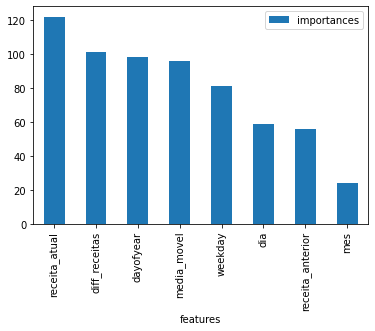

In [ ]:
feature_importances_df = pd.DataFrame({
    'features': X_test.columns.to_list(),
    'importances': lgbm_model.feature_importances_
}).sort_values(by='importances', ascending=False)

feature_importances_df.plot(y='importances',x='features', kind='bar')



**[RESPOSTA]** As variáveis de lag `receita_atual` e `diff_receitas` são as 2 variáveis mais importantes.

## Shap Values

**(0.5 ponto) `Q22`** Execute as linhas de código abaixo e interprete o gráfico `shap values`.

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509242 sha256=cd1461e0045b4e48af578b8171ba453c1eaad6c89542c74d839aabd352034078
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(lgbm_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

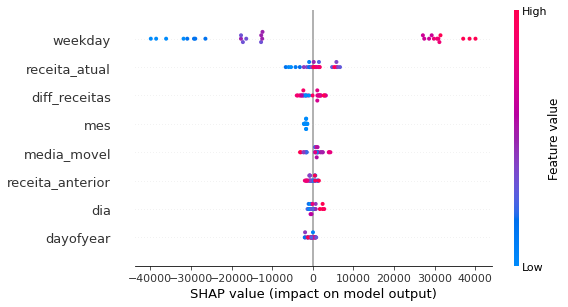

In [ ]:
shap.summary_plot(shap_values, X_test)